In [ ]:
# %pip install onnxruntime
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import csv
import joblib
from rembg import remove

  Using cached onnxruntime-1.19.2-cp39-cp39-win_amd64.whl.metadata (4.7 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl.metadata (9.2 kB)
  Using cached pyreadline3-3.5.4-py3-none-any.whl.metadata (4.7 kB)
Using cached onnxruntime-1.19.2-cp39-cp39-win_amd64.whl (11.1 MB)
Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   -------------------------------------- - 6.0/6.2 MB 46.1 MB/s eta 0:00:01
   ---------------------------------------- 6.2/6.2 MB 29.2 MB/s eta 0:00:00
Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)
   ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
   --------------------------------------- 536.2/536.2 kB 17.1 MB/s eta 0:00:00
Using cached pyreadline3-3.5.4-py3-none-any.whl (83 kB)
Note: you may need to restart the kernel to use updated packages.


In [221]:

def remove_background(image):
    """
    rembg를 이용하여 이미지의 배경을 제거하는 함수

    Parameters:
        image (numpy.ndarray): 원본 이미지 (BGR 형식)

    Returns:
        numpy.ndarray: 배경이 제거된 이미지 (RGBA 형식)
    """
    # OpenCV의 이미지를 PIL 이미지로 변환
    import PIL.Image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV 이미지는 BGR이므로 변환 필요
    pil_image = PIL.Image.fromarray(image_rgb)

    # 배경 제거 수행
    output_pil = remove(pil_image)

    # 다시 OpenCV 형식으로 변환 (RGBA 형식 유지)
    output = np.array(output_pil)

    output_bgr = cv2.cvtColor(output, cv2.COLOR_RGBA2BGR)
    return output_bgr

In [222]:
def resize_image(image, width=None, height=None, fx=None, fy=None, interpolation=cv2.INTER_LINEAR):
    """
    cv2.resize()를 활용하여 이미지를 크기 조정하는 함수

    Parameters:
        image (numpy.ndarray): 원본 이미지
        width (int, optional): 새로운 이미지의 너비 (dsize와 함께 사용)
        height (int, optional): 새로운 이미지의 높이 (dsize와 함께 사용)
        fx (float, optional): 가로 크기 비율 (dsize 대신 사용 가능)
        fy (float, optional): 세로 크기 비율 (dsize 대신 사용 가능)
        interpolation (int, optional): 보간법 (기본값 cv2.INTER_LINEAR)

    Returns:
        numpy.ndarray: 크기 조정된 이미지
    """
    if width is not None and height is not None:
        dsize = (width, height)
    else:
        dsize = None  # fx, fy가 사용됨

    resized = cv2.resize(image, dsize=dsize, fx=fx, fy=fy, interpolation=interpolation)
    return resized

In [223]:
data_dir = './_data/'
img_dir  = './_image/test/'


In [224]:
rf_model = joblib.load("./_model/rf_model.joblib")

In [225]:
imgList = os.listdir(img_dir)
imgList = [x for x in imgList if 'jpg' in x]

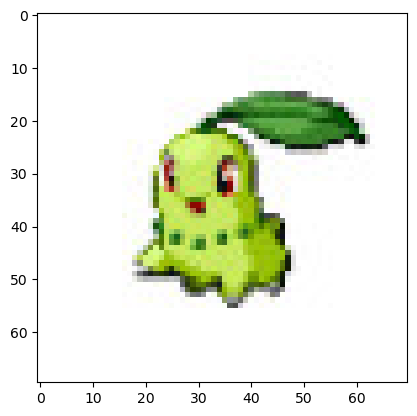

In [226]:
plt.imshow((cv2.imread(img_dir+imgList[0], cv2.IMREAD_COLOR_RGB)))

./_image/test/test (12).jpg


array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

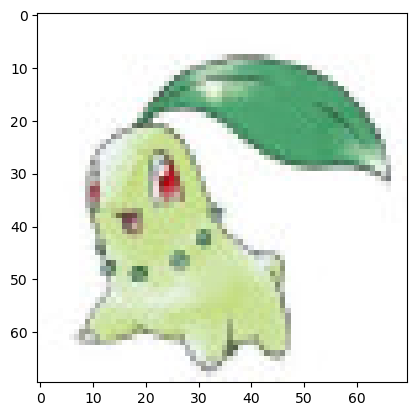

In [227]:
num = 3
examImg = cv2.imread(img_dir+imgList[num], cv2.IMREAD_COLOR_RGB)
print(img_dir+imgList[num])
plt.imshow(examImg)
examArr = cv2.imread(img_dir+imgList[num], cv2.IMREAD_COLOR_RGB).flatten()
examArr

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


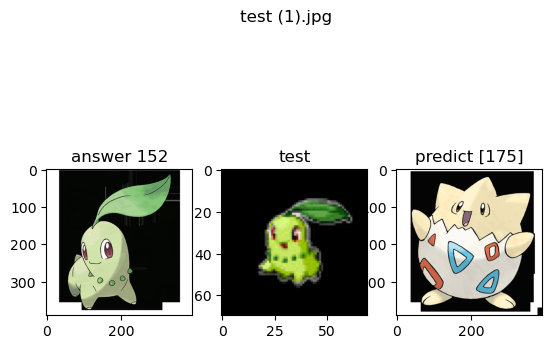

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017401.png


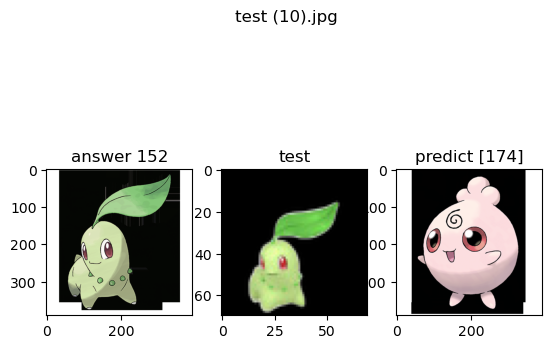

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


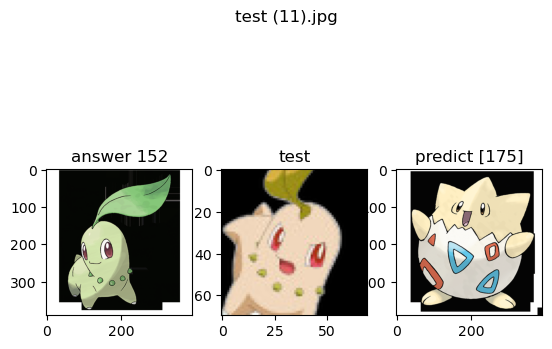

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


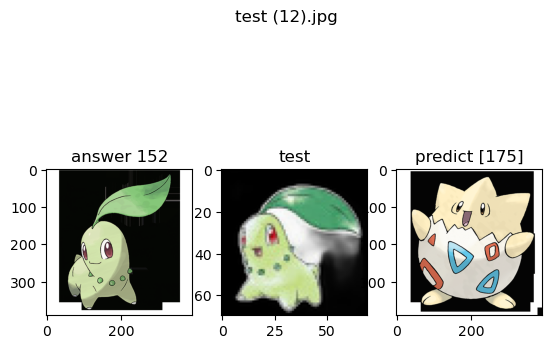

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


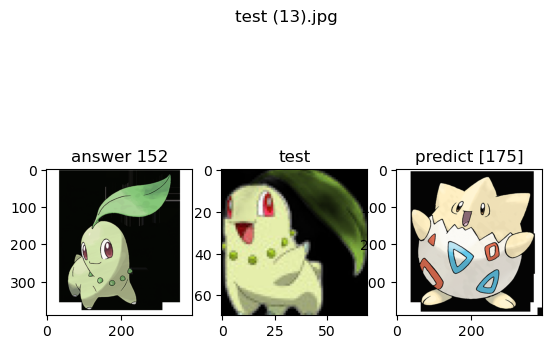

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


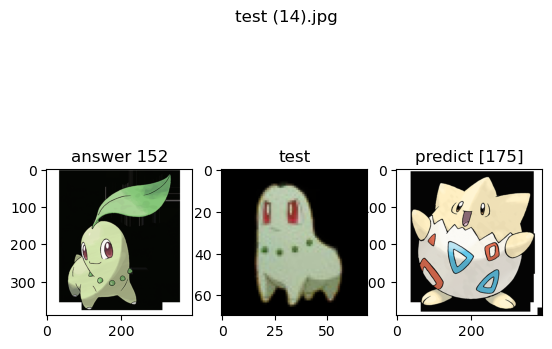

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


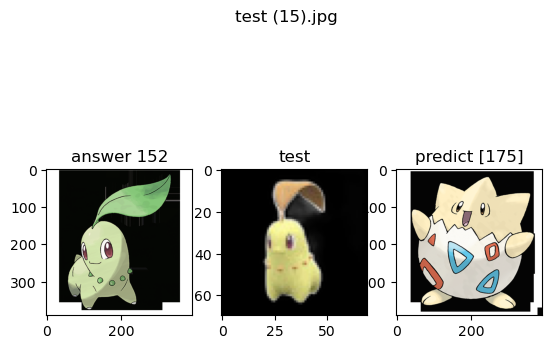

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


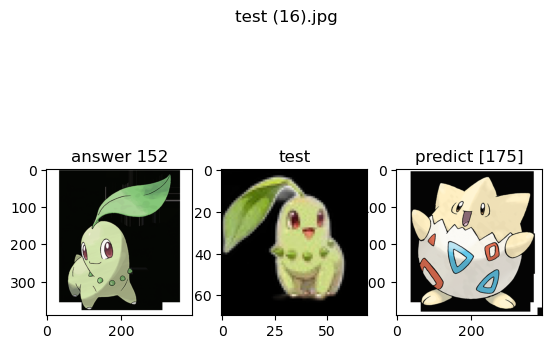

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


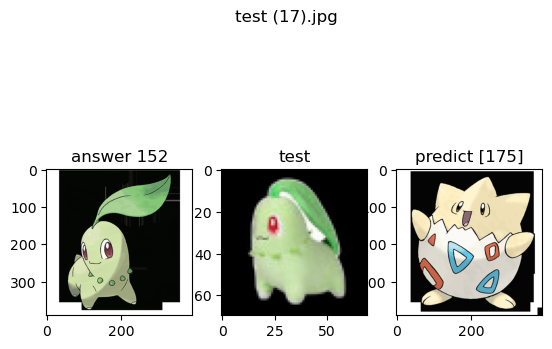

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


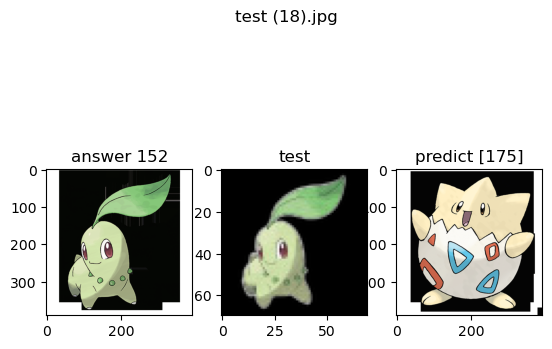

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


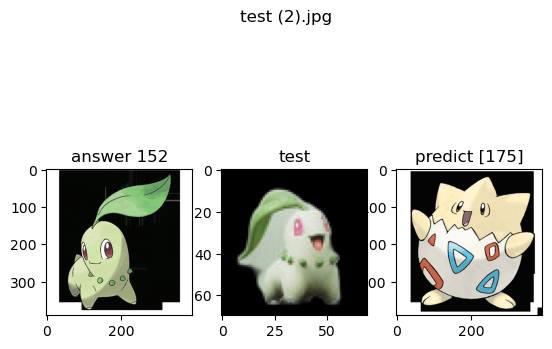

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


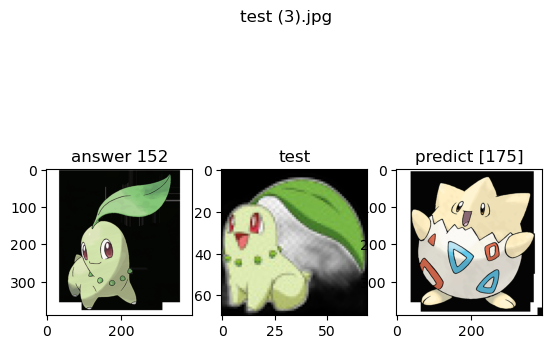

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


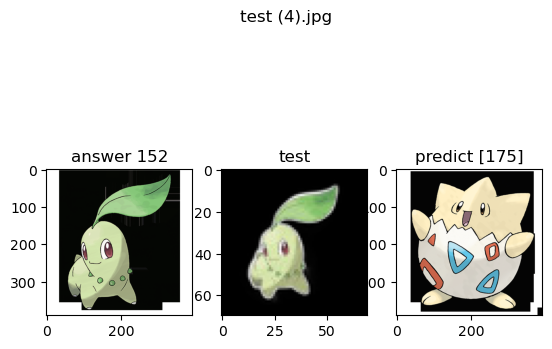

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


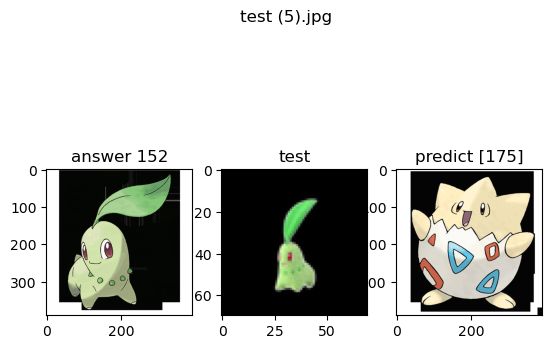

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


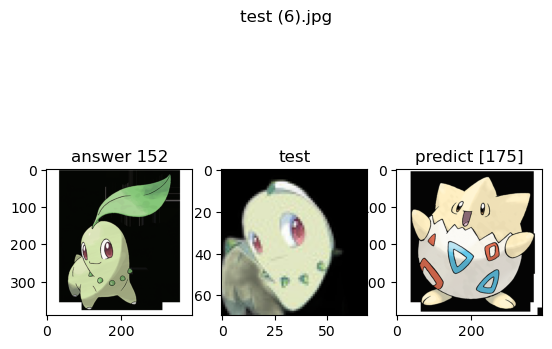

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


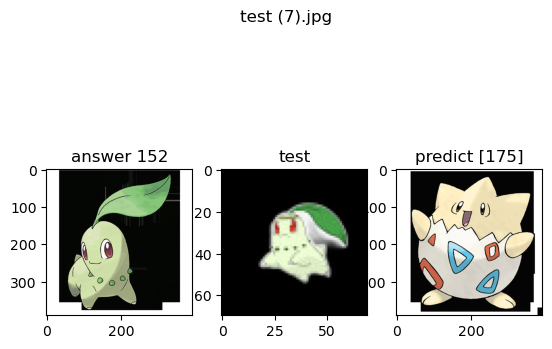

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


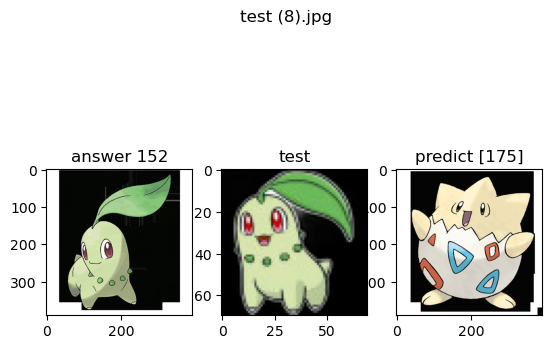

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


./_image/017501.png


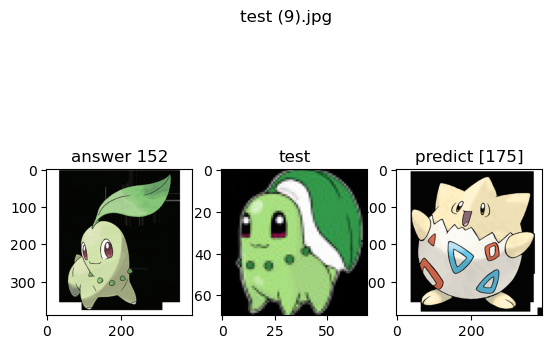

In [237]:
count = 0


# real_pre = dt_model.predict(examDF.loc[i].values.reshape(1, -1))
for i in range(len(imgList)):
    poke_num = 152
    examImg = cv2.imread(img_dir+imgList[i], cv2.IMREAD_COLOR_RGB)
    examImg = remove_background(examImg)
    # plt.imshow(examImg)
    # print(examImg.shape)
    examArr = examImg.reshape(1,-1)
    real_pre = rf_model.predict(pd.DataFrame(examArr))
    # if real_pre == examDF.loc[i,'0']:
    #     count+=1

    fig, axe = plt.subplots(1,3)
    axe = axe.flatten()
    answer_dir = './_image/0'+str(poke_num)+'01.png'
    axe[0].imshow(cv2.imread(answer_dir,cv2.IMREAD_COLOR_RGB))
    axe[0].set_title(f'answer {poke_num}')
    axe[1].imshow(examImg)
    axe[1].set_title('test')
    real_predir = './_image/0'+str(*real_pre)+'01.png'
    print(real_predir)
    axe[2].imshow(cv2.imread(real_predir,cv2.IMREAD_COLOR_RGB))
    axe[2].set_title(f'predict {real_pre}')
    fig.suptitle(imgList[i])
    plt.show()